## Task 1，线性回归任务一

观看李宏毅课程内容：P1、P2。

视频：[B站李老师2017的课程](https://www.bilibili.com/video/av10590361?from=search&seid=2528333740967753954)

课间： http://speech.ee.ntu.edu.tw/~tlkagk/courses_ML17_2.html

学习打卡任务内容：
了解什么是Machine learning
学习中心极限定理，学习正态分布，学习最大似然估计
推导回归Loss function
学习损失函数与凸函数之间的关系
了解全局最优和局部最优
学习导数，泰勒展开
推导梯度下降公式
写出梯度下降的代码
学习L2-Norm，L1-Norm，L0-Norm
推导正则化公式
说明为什么用L1-Norm代替L0-Norm
学习为什么只对w/Θ做限制，不对b做限制


5.13 22点前交 作业布置：https://shimo.im/docs/AwXoao2nWksieo1j/read

参考 https://datawhalechina.github.io/Leeml-Book/#/chapter2/chapter2

https://note.youdao.com/ynoteshare1/index.html?id=56902ce0867a2aad3d1bff3453e46702&type=note


## 什么是机器学习

[Machine learning (ML)](https://searchenterpriseai.techtarget.com/definition/machine-learning-ML) is a category of algorithm that allows software applications to become more accurate in predicting outcomes without being explicitly programmed. The basic premise of machine learning is to build algorithms that can receive input data and use statistical analysis to predict an output while updating outputs as new data becomes available.

The processes involved in machine learning are similar to that of data mining and predictive modeling. Both require searching through data to look for patterns and adjusting program actions accordingly. 

## 概率基础

**概率分布**：概率，条件概率，独立事件，边际分布，联合分布
**常见分布**：均匀分布，伯努利分布，二项分布，正态分布，泊松分布，拉普拉斯分布，指数分布，伽马分布，贝塔分布，狄克拉分布，多项分布于狄利克雷分布，混合概率分布
**统计量**：期望，方差，协方差，相关系数 （期望方差转换）

### 大数定律

**切比雪夫不等式**：$P(|X-\mu| \geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}$，距离均值足够远（大于等于$\epsilon$）的事件发生的概率小于等于$\frac{\sigma^2}{\epsilon^2}$

**依概率收敛**：随机序列$Y_1,Y_2,\dots,Y_n,\dots$,其依概率收敛到常数a，当$\lim\limits_{n\to \infty} P(|Y_n-a| \leq \epsilon) = 1$,简记$Y_n\to^P a$

**大数定理**：随机变量$X_1,X_2,\dots,X_n,\dots$相互独立，满足$E(X_k)=\mu, Var(X_k)=\sigma^2$,则$\bar X=\frac{1}{n}\sum_{k=1}^{n}X_k$依概率收到$\mu$,即$\bar X\to^P\mu$.

 - **伯努利大数定律**：$n_A$为n次独立重复实验中A发生的次数，p为其发生的概率，则有$\lim\limits_{n\to \infty} P(|\frac{n_A}{n}-p| \leq \epsilon) = 1$。<u>即重复次数足够多后，事件A发生的频率将逼近其概率。</u>
 
 - **辛钦大数定律**:独立同分布变量$X_1,X_2,\dots,X_n,\dots$，满足$E(X_k)=\mu$,则$\lim\limits_{n\to \infty} P(|\bar X-\mu| \leq \epsilon) = 1$。<u>没有要求方差存在，伯努利是他的特例</u>。

### 中心极限定理

**独立同分布**: 变量$X_1,X_2,\dots,X_n$,iid，其中$E(X_k)=\mu，Var(X_k)=\sigma^2$,则$Y_n=n\bar X=\sum_{k=1}^{n}X_k$,近似服从正态分布：即

$$\lim\limits_{n\to \infty} P( Y_n \leq x) \to N(n\mu,n\sigma^2)$$

**Liapunov定理**：随机变量$X_1,X_2,\dots,X_n$相互独立，$E(X_k)=\mu_k,Var(X_k)=\sigma_k^2$,记$B_n^2=\sum_{k=1}^n \sigma_k^2$。若存在$\delta>0$,使得$\lim\limits_{n\to \infty}  \frac{1}{B_n^{2+\delta}}\sum_{k=1}^n E[|X_k-\mu_k|^{2+\delta}] \to 0$,则有

$$\lim\limits_{n\to \infty} P( Y_n \leq x) \to N(\sum_{k=1}^n \mu_k, B_n^2)$$.

**Demoive-Laplace定理**：二项分布的极限分布是正态分布, $\eta_n \sim Bion(n,p)$,则有

$$\lim\limits_{n\to \infty} P( \eta_n \leq x) \to N(np,np(1-p)$$

### 正态分布（高斯分布）

<u>中心极限定理的支撑，并且在所有相同方差的分布中，正态分布的熵最大（即不确定性）</u>。

#### 一维正态分布

x服从正太分布参数$\mu,\sigma>0$,简记$X \sim N(\mu, \sigma^2)$，概率密度：

$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

<u>有限个互相独立的正态分布的线性组合仍然是正态分布</u>。

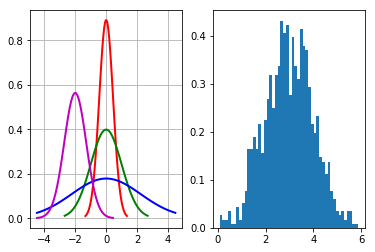

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Python实现正态分布
# 绘制正态分布概率密度函数
u = 0   # 均值μ
u01 = -2
sig = math.sqrt(0.2)  # 标准差δ
sig01 = math.sqrt(1)
sig02 = math.sqrt(5)
sig_u01 = math.sqrt(0.5)

def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

x = np.linspace(u - 3*sig, u + 3*sig, 50)
x_01 = np.linspace(u - 6 * sig, u + 6 * sig, 50)
x_02 = np.linspace(u - 10 * sig, u + 10 * sig, 50)
x_u01 = np.linspace(u - 10 * sig, u + 1 * sig, 50)

y_sig = normfun(x, u, sig) #np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)
y_sig01 = normfun(x_01, u, sig01) #np.exp(-(x_01 - u) ** 2 /(2* sig01 **2))/(math.sqrt(2*math.pi)*sig01)
y_sig02 = normfun(x_02, u, sig02) # np.exp(-(x_02 - u) ** 2 / (2 * sig02 ** 2)) / (math.sqrt(2 * math.pi) * sig02)
y_sig_u01 = normfun(x_u01, u01, sig_u01) # np.exp(-(x_u01 - u01) ** 2 / (2 * sig_u01 ** 2)) / (math.sqrt(2 * math.pi) * sig_u01)
plt.subplot(121)
plt.plot(x, y_sig, "r-", linewidth=2)
plt.plot(x_01, y_sig01, "g-", linewidth=2)
plt.plot(x_02, y_sig02, "b-", linewidth=2)
plt.plot(x_u01, y_sig_u01, "m-", linewidth=2)
plt.grid(True)

s = np.random.normal(3, 1, 1000)
plt.subplot(122)
plt.hist(s, 50, normed=True)
plt.show()

#### 正态分布的极大似然估计

首先对于一批样本$x_i, \dots x_n$,其似然函数可以写出：

$$L=\prod_{i=1}^n p(x_i,;\mu,\sigma)$$

则对数似然函数(删除与参数无关的项)，带入密度函数有：

$$\log L = -\frac{n}{2}\ln (\sigma^2)- \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2$$

$$(\mu_{mle},\sigma^2_{mle})=argmax_{\{\mu,\sigma^2\}} log L $$

为此可以通过求导为0极大化可以求得，$\mu_{mle}=\frac{1}{n}\sum_{i=1}^n x_i=\bar x,\sigma^2_{mle}=\frac{1}{n}\sum_{i=1}^n (x_i-\bar x)^2$

可以看出极大似然估计只需要根据要求写出似然函数，当函数为上凸函数时，存在最大值使得数据最好拟合相应的参数。很多时候没有显示解可以通过数值迭代的方式进行逼近，如牛顿迭代，梯度下降等。

#### 高维正态分布

随机变量 $\mathbf x=(x_1,x_2,\dots,x_n)^T$, 均值$\mu=(\mu_1,\mu_2,\dots,\mu_n)^T$, $\Sigma$为协方差矩阵，则概率密度：

$$p(\mathbf x)=\frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\exp\{-\frac{1}{2}(\mathbf x-\mu)^T\Sigma^{-1}(\mathbf x-\mu)\}$$

 - 其每一个分量都是正态分布；
 
 - n维随机变量$\mathbf X=(X_1,X_2,\dots,X_n)^T$服从正态分布 <=> $\sum_{i=1}^nl_iX_i$服从一维正态分布；
 
 - 正态变量的线性变换不变性；
 
 - 多元正态分布中各分量独立<=>各分量两两不相关。
 

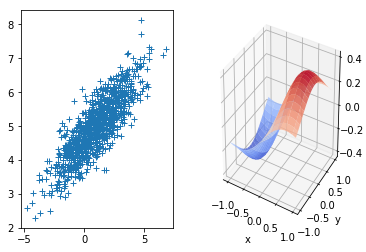

In [46]:
#https://www.zhihu.com/question/39823283/answer/115241445
 
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
 
# 二维正态分布
mu = np.array([[1, 5]])
Sigma = np.array([[1, 0.5], [1.5, 3]])
R = cholesky(Sigma)
s = np.dot(np.random.randn(1000, 2), R) + mu
plt.subplot(121)
plt.plot(s[:,0],s[:,1],'+')

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = x * np.exp(-x ** 2 - y ** 2)
 
ax = plt.subplot(122, projection='3d')
ax.plot_surface(x, y, z, rstride=2, cstride=1, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### 线性回归

给定示例 $\mathbf x=(x_1,\dots,x_d)$，其中$x_i$是第$i$个属性的取值，响应变量记为$y$,则我们希望通过线性组合来进行预测函数： $f(\mathbf x)=\mathbf w^T\mathbf x + b$。

#### 一般情形

给定数据集$D=\{(\mathbf x_1,y_1),\dots, (\mathbf x_n,y_n)\}$,我们希望采用一个好的$f$来对D进行建模，如何衡量好坏就需要定义损失函数。在连续数值的情况下一般采用均方误差，极小化该损失来求得f中的参数，简称**最小二乘法**，<u>意义便是使所有的样本点到f的欧氏距离之和最小</u>。
    
$$\hat w = \arg_w \min (\mathbf{(y-Xw)^T(y-Xw)})$$    

![](step2.png)

#### 损失函数--最小二乘

其中损失函数记为$E_w=\mathbf{(y-Xw)^T(y-Xw)}$,很容易推导出该损失函数在马尔科夫正态性假设下，与MLE是一致的。并且该损失函数是下凹函数，因为其二阶导为二次型一直大于0，为此存在最小值，只需要对于求导令等于0即可，即$\mathbf{w=(X^TX)^{-1}X^Ty}$。

然而实际中，有些损失函数无显示最优解，这时候需要用到数值迭代求解,如一阶的梯度迭代或是二阶的牛顿迭代：


![](step3.png)

在梯度迭代过程中，将会陷入局部最优解，为此合适的初值是关键。

In [ ]:
import numpy as np

def __init__(self,n,iter_max=1000,eta):
    self.iter_max=iter_max
    self.learning_rate=eta
    self.W=np.zeros([n,1])
    self.b=np.zeros([n,1])

def gradient_descent(self,y,X):
    m,n=X.shape
    residual=np.dot(X, self.W)+self.b-y
    dw=2*np.dot(X.T,residual)
    db=2*np.sum(residual)
    #loss=np.sum((yhat-y)**2)/m
    w=self.W-self.learning_rate*dw
    b=self.b-self.learning_rate*db
    return w,b,yhat,loss

w,b=[],[]
def linear_solve(self,X,y):
    for i in range(self.iter_max):
        self.W,self.b,ypred,loss=gradient_descent(y,X)
        w.append(self.W)
        b.append(self.b)

#### 正则化

在线性回归中，$\mathbf{w=(X^TX)^{-1}X^Ty}，其中$X^TX$很多情况下是不可逆的，比如样本少于特征时。一种策略便是采用[PCA](https://www.cnblogs.com/sweetyu/p/5085798.html)(https://www.jianshu.com/p/d090721cf501)进行特征的线性组合，使得矩阵满秩进而求解,第二种更常用的策略便是正则化，包括L1范数的lasso，L2范数的Ridge等。其形式如图：

![](step2_1.png)

##### L2范数

其在损失函数后对回归系数添加二范数惩罚：$$L_2=E_w+\lambda\mathbf{w^Tw}=\mathbf{(y-Xw)^T(y-Xw)}+\lambda\mathbf{w^Tw}$$

该形式可以得到显示解 $\mathbf{w=(X^TX+\lambda I)^{-1}X^Ty}$,也就是说等价于在$X^TX$矩阵的对角线上都添加了一个常数使得该矩阵可逆。$\lambda$可以通过交叉验证进行训练选择。几何解释如下图右

![](v2-2a88e2acc009fa4de3edeb51e683ca02_hd.jpg)

##### L1范数

从上图可以看出L2惩罚会使得很多回归系数趋近与0，但是不会等于0，而L1范数则有直接进行特征选择的功能，可以有效避免过度拟合，其目标函数为：

$$L_1=E_w+\lambda\sum{|w|}=\mathbf{(y-Xw)^T(y-Xw)}+\lambda\sum{|w|}$$

对于lasso由于正则项不可导，为此需要用坐标梯度下降的方式进行参数的求解。
